Ladda in custom dataset och göra till LAB

In [57]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils import data as D

from customdataset import TinyImageNet, imshow_combine

In [58]:
path = 'data/tiny-imagenet-200/train/n01443537/images/'

imagenet = TinyImageNet(path)
loader = D.DataLoader(imagenet, batch_size=16, shuffle=False)
dataiter = iter(loader)

features, labels = dataiter.next()
feat = features[0]
lab = labels[0]

#lab = lab.view(1,-1)

#imshow_combine(feat, lab)
print(lab.size())

torch.Size([1, 8192])


In [59]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 32, 64, 1000, 10

In [60]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # in_channels, out_channels
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(10 * 32 * 32, 8192)
        self.fc2 = nn.Linear(8192, 8192)
        
    
    def forward(self, x):
        x = x.view(-1, 1, 64, 64)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.avg_pool2d(x, 2)
        x = x.view(-1, 10 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

net = Net()

In [61]:
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [62]:
print(feat.size())

torch.Size([64, 64])


In [63]:
ans = net.forward(feat.float())
print(ans.size())

torch.Size([1, 8192])


In [64]:
output = net.forward(feat.float())
print(output.size())
lab = lab.float()
print(lab.size())

optimizer.zero_grad()
loss = criterion(output, lab)


torch.Size([1, 8192])
torch.Size([1, 8192])


In [72]:
losses = []
for epoch in range(20):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.float()
        labels = labels.float()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        if i % 10 == 0:
            print(loss.item())
        
print('Finished Training')
print(losses)

533.6238403320312
437.0896911621094
492.104248046875
422.8951110839844
533.233642578125
436.63104248046875
491.67352294921875
422.6086730957031
533.2312622070312
436.47064208984375
491.44915771484375
422.4251708984375
533.2586059570312
436.3490295410156
491.280029296875
422.28326416015625
533.2825317382812
436.2298889160156
491.1513977050781
422.1745300292969
533.3114013671875
436.1213684082031
491.0508728027344
422.087646484375
533.3436889648438
436.0187072753906
490.9712829589844
422.01641845703125
533.3690795898438
435.8614501953125
490.9040222167969
421.95831298828125
533.3939819335938
435.7744140625
490.8496398925781
421.9085998535156
533.4247436523438
435.69775390625
490.804931640625
421.867431640625
533.436279296875
435.5707702636719
490.765869140625
421.83154296875
533.459228515625
435.51055908203125
490.73406982421875
421.8016357421875
533.4636840820312
435.3915710449219
490.7062072753906
421.7746887207031
533.4810791015625
435.3285217285156
490.68292236328125
421.751922607421

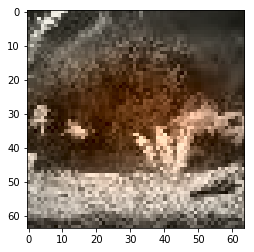

In [73]:
output_end = net.forward(feat.float())
output_end = output_end.view(2,64,64)
imshow_combine(feat, output_end.detach())